In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("prosperLoanData.csv")
df.head

<bound method NDFrame.head of                      ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000  

In [4]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
df['Term'].unique()

array([36, 60, 12])

In [6]:
df['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [7]:
df['ProsperRating (numeric)'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

In [9]:
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [10]:
df['DebtToIncomeRatio']

0         0.17
1         0.18
2         0.06
3         0.15
4         0.26
          ... 
113932    0.13
113933    0.11
113934    0.51
113935    0.48
113936    0.23
Name: DebtToIncomeRatio, Length: 113937, dtype: float64

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [60]:
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [93]:
df.dropna(subset=['ProsperRating (numeric)'], inplace=True)

In [109]:
verif = df.groupby('ProsperRating (numeric)').value_counts()
verif['IncomeVerifiable']

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [108]:
plt.scatter(verif['EmploymentStatus'], verif.index)
plt.ylabel("BankcardUtilization")
plt.xlabel('StatedMonthlyIncome')
plt.show()

KeyError: 'EmploymentStatus'

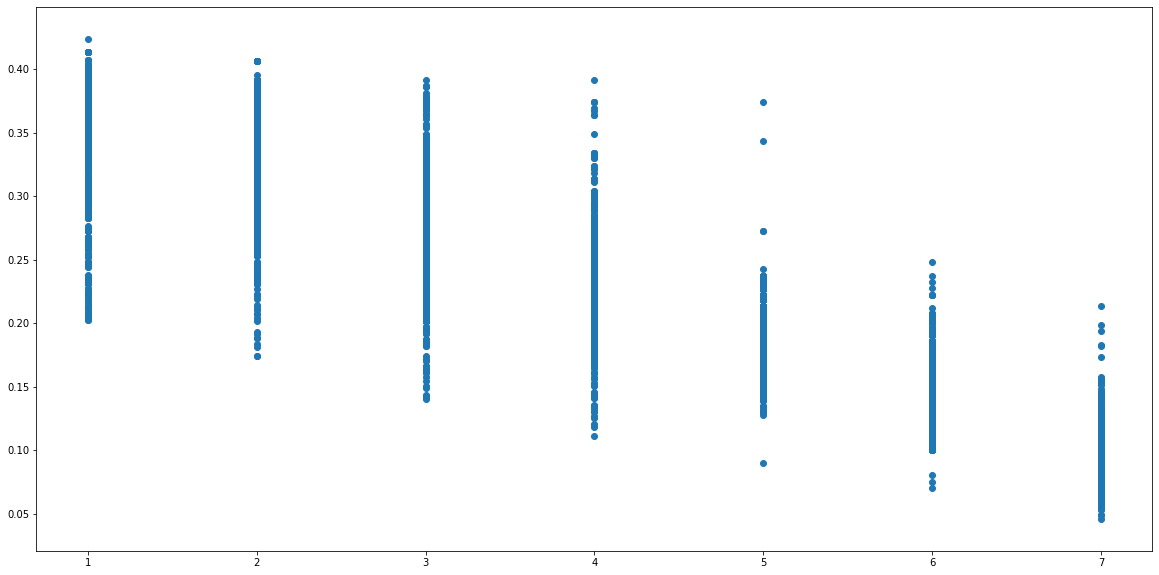

In [92]:
plt.scatter(df['ProsperRating (numeric)'], df['BorrowerAPR'])

In [28]:
import seaborn as sn


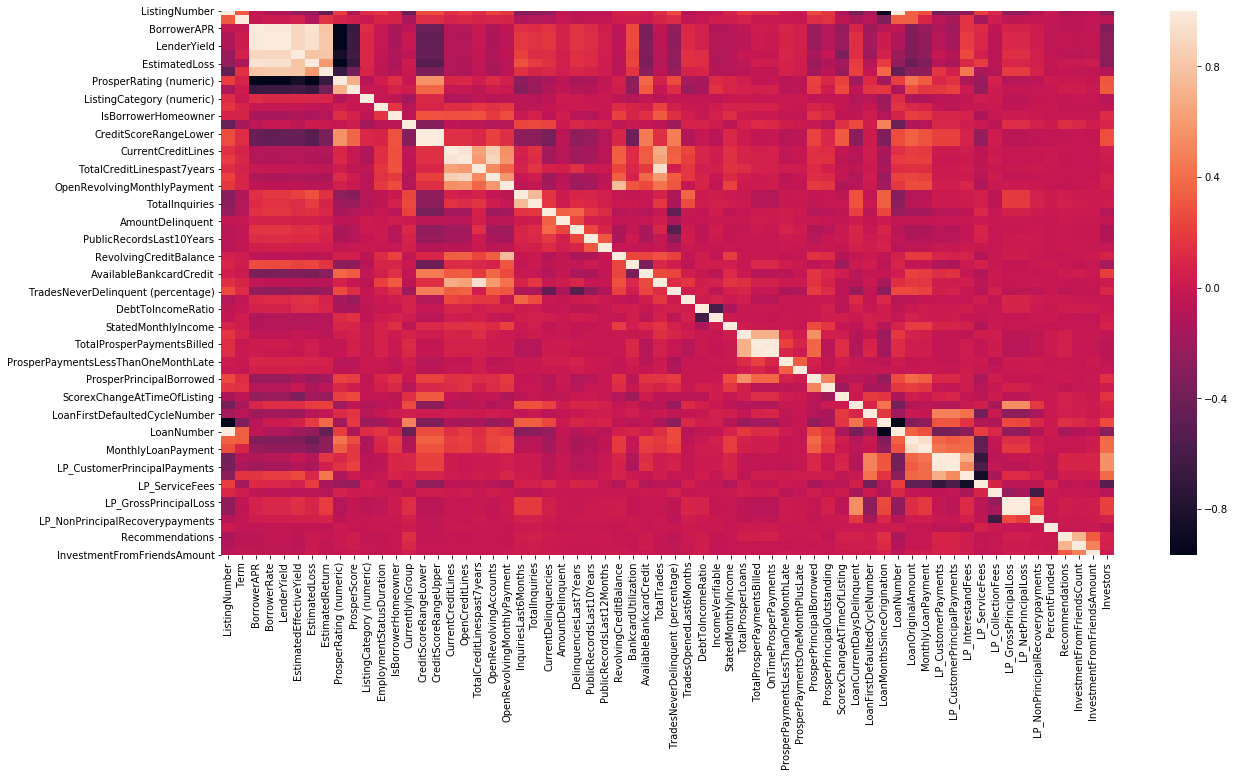

In [31]:
sn.heatmap(df.corr())

In [33]:
corr = df.corr()

In [34]:
corr.unstack()

ListingNumber  ListingNumber                  1.000000
               Term                           0.319971
               BorrowerAPR                   -0.031520
               BorrowerRate                  -0.114391
               LenderYield                   -0.113544
                                                ...   
Investors      PercentFunded                 -0.049716
               Recommendations                0.073824
               InvestmentFromFriendsCount     0.058773
               InvestmentFromFriendsAmount    0.012178
               Investors                      1.000000
Length: 4096, dtype: float64

In [35]:
corr = corr.abs()

In [54]:
corr['StatedMonthlyIncome']['BankcardUtilization']

0.037117658907257024

In [36]:
s = corr.unstack()

so = s.sort_values(kind="quicksort")
so

PublicRecordsLast12Months           ProsperPaymentsOneMonthPlusLate       5.347996e-07
ProsperPaymentsOneMonthPlusLate     PublicRecordsLast12Months             5.347996e-07
LoanFirstDefaultedCycleNumber       DebtToIncomeRatio                     5.862193e-05
DebtToIncomeRatio                   LoanFirstDefaultedCycleNumber         5.862193e-05
TotalProsperLoans                   InvestmentFromFriendsCount            9.789640e-05
                                                                              ...     
DebtToIncomeRatio                   DebtToIncomeRatio                     1.000000e+00
TradesOpenedLast6Months             TradesOpenedLast6Months               1.000000e+00
TradesNeverDelinquent (percentage)  TradesNeverDelinquent (percentage)    1.000000e+00
AvailableBankcardCredit             AvailableBankcardCredit               1.000000e+00
Investors                           Investors                             1.000000e+00
Length: 4096, dtype: float64

In [44]:
so[so < 0.97].index

MultiIndex([(      'PublicRecordsLast12Months', ...),
            ('ProsperPaymentsOneMonthPlusLate', ...),
            (  'LoanFirstDefaultedCycleNumber', ...),
            (              'DebtToIncomeRatio', ...),
            (              'TotalProsperLoans', ...),
            (     'InvestmentFromFriendsCount', ...),
            (    'ProsperPrincipalOutstanding', ...),
            (      'PublicRecordsLast12Months', ...),
            (            'IsBorrowerHomeowner', ...),
            (              'DebtToIncomeRatio', ...),
            ...
            (        'ProsperRating (numeric)', ...),
            (                   'BorrowerRate', ...),
            (        'ProsperRating (numeric)', ...),
            (                    'LenderYield', ...),
            (             'CurrentCreditLines', ...),
            (                'OpenCreditLines', ...),
            (                    'BorrowerAPR', ...),
            (        'ProsperRating (numeric)', ...),
            